<a href="https://colab.research.google.com/github/AlexDiata/ITBA_3205_Eart-Benders/blob/main/Codes/LandSlideRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt


# **Data Cleaning of Landslide Dataset**
*Source:*[*NASA Global Landslide Catalog*](https://data.nasa.gov/Earth-Science/Global-Landslide-Catalog/h9d8-neg4)


*   This will provide the cleaned dataset for the recorded landslides that occur within the Philippines from 2010-2018.



In [122]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/nasa_global_landslide_catalog_point.csv'
df = pan.read_csv(url)
#Removing landslide data from other countries beside Philippines
df = df.loc[df['country_name'] == 'Philippines']
#Dropping of columns that have irrelevant data
to_drop = ['OBJECTID','Shape','source_name','source_link', 
           'event_id','event_title','event_time','event_description','location_description',
           'event_import_id','latitude','longitude','gazetteer_closest_point', 
           'gazetteer_distance','submitted_date','last_edited_date','location_accuracy',
           'landslide_trigger', 'landslide_size','landslide_setting','fatality_count','injury_count',
           'storm_name', 'photo_link','comments','event_import_source',]
new_df = df.drop(to_drop, inplace=True, axis=1)
display(df)

,event_date,landslide_category,country_name,country_code,admin_division_name
35,2007-11-19 00:00:00,landslide,Philippines,PH,Surigao del Norte
39,2014-07-23 03:30:00,landslide,Philippines,PH,Rizal
45,2015-07-13 00:00:00,landslide,Philippines,PH,Benguet
55,2009-06-23 00:00:00,landslide,Philippines,PH,Misamis Oriental
66,2008-06-29 00:00:00,landslide,Philippines,PH,Cebu
...,...,...,...,...,...
35580,2012-02-16 00:00:00,landslide,Philippines,PH,Leyte
35606,2014-06-30 15:00:00,landslide,Philippines,PH,South Cotabato
35611,2010-10-18 00:00:00,landslide,Philippines,PH,Aurora
35633,2015-01-09 00:00:00,landslide,Philippines,PH,Surigao del Sur


In [123]:
#Dropping of data that happend before 2010 and after 2018
df["event_date"] = pan.to_datetime(df["event_date"])
df['event_date'] = pan.to_datetime(df['event_date'],format='%Y%m%d')
df['event_date'] = pan.DatetimeIndex(df['event_date']).year
df.drop(df[df['event_date'] < 2010].index, inplace=True)
df.drop(df[df['event_date'] > 2018].index, inplace=True)
display(df)

,event_date,landslide_category,country_name,country_code,admin_division_name
39,2014,landslide,Philippines,PH,Rizal
45,2015,landslide,Philippines,PH,Benguet
89,2010,landslide,Philippines,PH,Cebu
95,2014,landslide,Philippines,PH,Maguindanao
111,2012,landslide,Philippines,PH,Camarines Sur
...,...,...,...,...,...
34981,2018,landslide,Philippines,PH,Eastern Samar
35580,2012,landslide,Philippines,PH,Leyte
35606,2014,landslide,Philippines,PH,South Cotabato
35611,2010,landslide,Philippines,PH,Aurora


In [124]:
#Further dropping of irrelevant data
to_drop = ['landslide_category','country_name','country_code',]
new_df = df.drop(to_drop, inplace=True, axis=1)
result = df.dtypes
print(result)
display(df)

event_date              int64
admin_division_name    object
dtype: object


,event_date,admin_division_name
39,2014,Rizal
45,2015,Benguet
89,2010,Cebu
95,2014,Maguindanao
111,2012,Camarines Sur
...,...,...
34981,2018,Eastern Samar
35580,2012,Leyte
35606,2014,South Cotabato
35611,2010,Aurora


# **Landslide Dataset**


*   This provides the dataset for the recorded landslide that happened in all the provinces in the Philippines from 2010-2018.



col_0,count
Administrative area,
Abra,4
Agusan del Norte,4
Agusan del Sur,3
Aklan,2
Albay,16
...,...
Zambales,8
Zamboanga City,8
Zamboanga Sibuguey,3


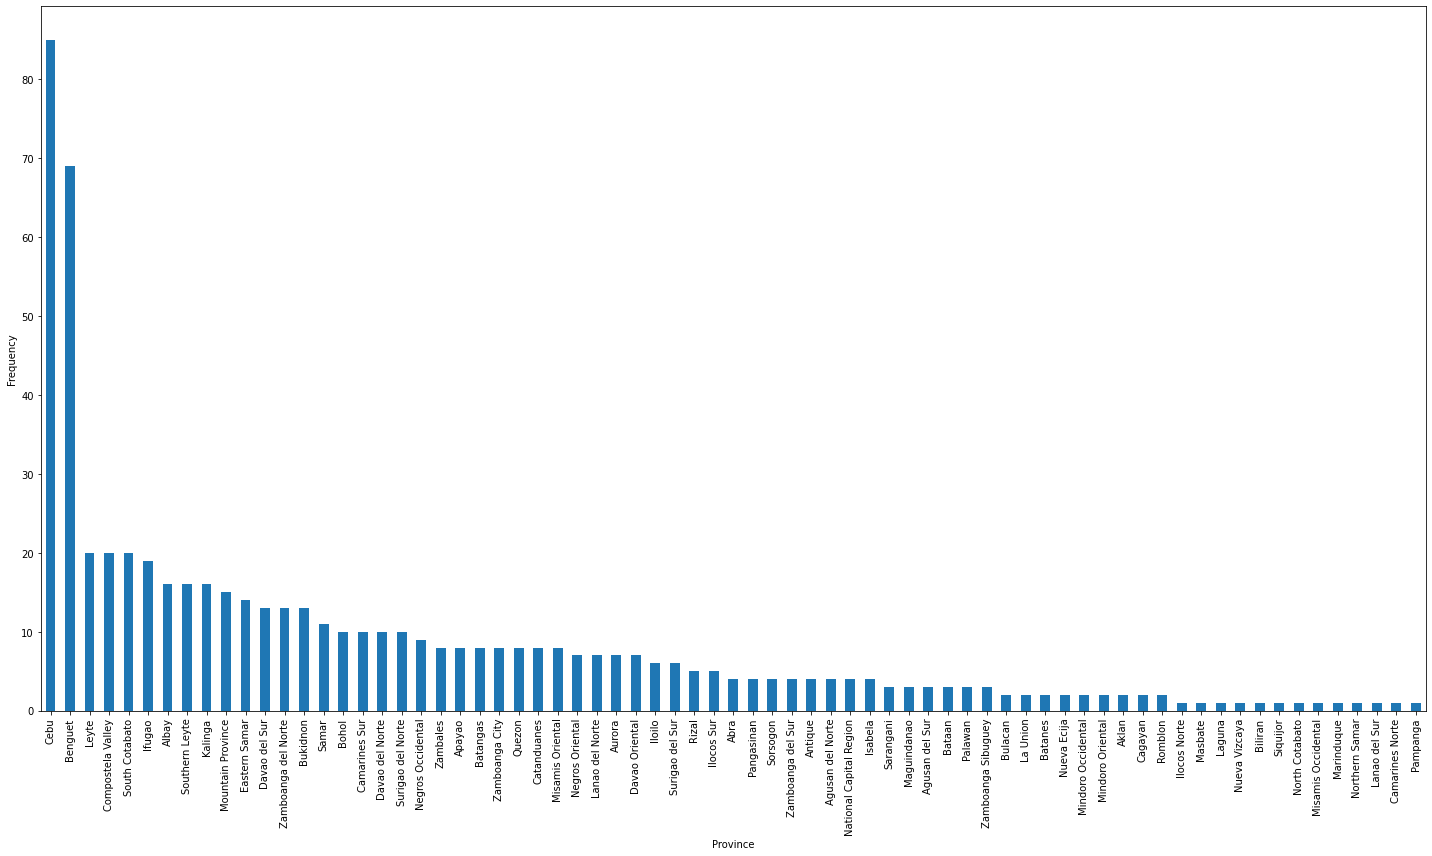

In [125]:
#plt.rcParams["figure.figsize"] = [20, 12]
#plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df = df.rename(columns = {'admin_division_name':'Administrative area'}, inplace = False)
df['Administrative area'].value_counts().plot(ax=ax, kind='bar', xlabel='Province', ylabel='Frequency')
df = pan.crosstab(index=df["Administrative area"], columns="count") 
display(df)
plt.show()

# **Data Cleaning of Forest Loss Dataset**
*Source:*[*NASA Global Landslide Catalog*](https://data.nasa.gov/Earth-Science/Global-Landslide-Catalog/h9d8-neg4)


*   This will provide the cleaned dataset for the recorded forest loss that occur within the Philippines from 2010-2018.



In [126]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/Tree%20cover%20data%20for%20subnational%20administrative%20areas%20in%20Philippines.csv'
df2 = pan.read_csv(url)
#Dropping of columns that have irrelevant data
to_drop2 = ['Total','Tree cover','% cover','Loss', 
           '% loss','Avg loss/year','Loss 2001-2010','loss','Avg loss/year 2001-2010',
           'Loss 2011-2018','Avg loss/year 2011-2018',]
new_df2 = df2.drop(to_drop2, inplace=True, axis=1)
display(df2)

,Administrative area,Tree cover.1,Tree cover.2,loss.1
0,NaN,Extent,Extent,between
1,NaN,in 2010 (ha),in 2018 (ha),2011-2018
2,Abra,260337,258479,1%
3,Agusan del Norte,244975,234366,4%
4,Agusan del Sur,772606,707229,8%
...,...,...,...,...
80,Zamboanga Sibugay,180381,171121,5%
81,Zamboanga del Norte,448780,418404,7%
82,Zamboanga del Sur,315804,306193,3%
83,NaN,NaN,NaN,NaN


# **Forest Loss Dataset**


*  This provides the dataset for the recorded forest loss that happened in all 
the provinces in the Philippines from 2010-2018.

In [127]:
#Filling Nan/Na Cell
df2 = df2.fillna(0)
df2.drop(df2.head(2).index,inplace=True)
df2.drop(df2.tail(2).index,inplace=True)
df2['loss.1'] = df2['loss.1'].str.replace(r'\D', '').astype(int)

display(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Administrative area,Tree cover.1,Tree cover.2,loss.1
2,Abra,260337,258479,1
3,Agusan del Norte,244975,234366,4
4,Agusan del Sur,772606,707229,8
5,Aklan,115858,114432,1
6,Albay,174727,173006,1
...,...,...,...,...
78,Tawi-Tawi,100005,93363,7
79,Zambales,177982,175827,1
80,Zamboanga Sibugay,180381,171121,5
81,Zamboanga del Norte,448780,418404,7


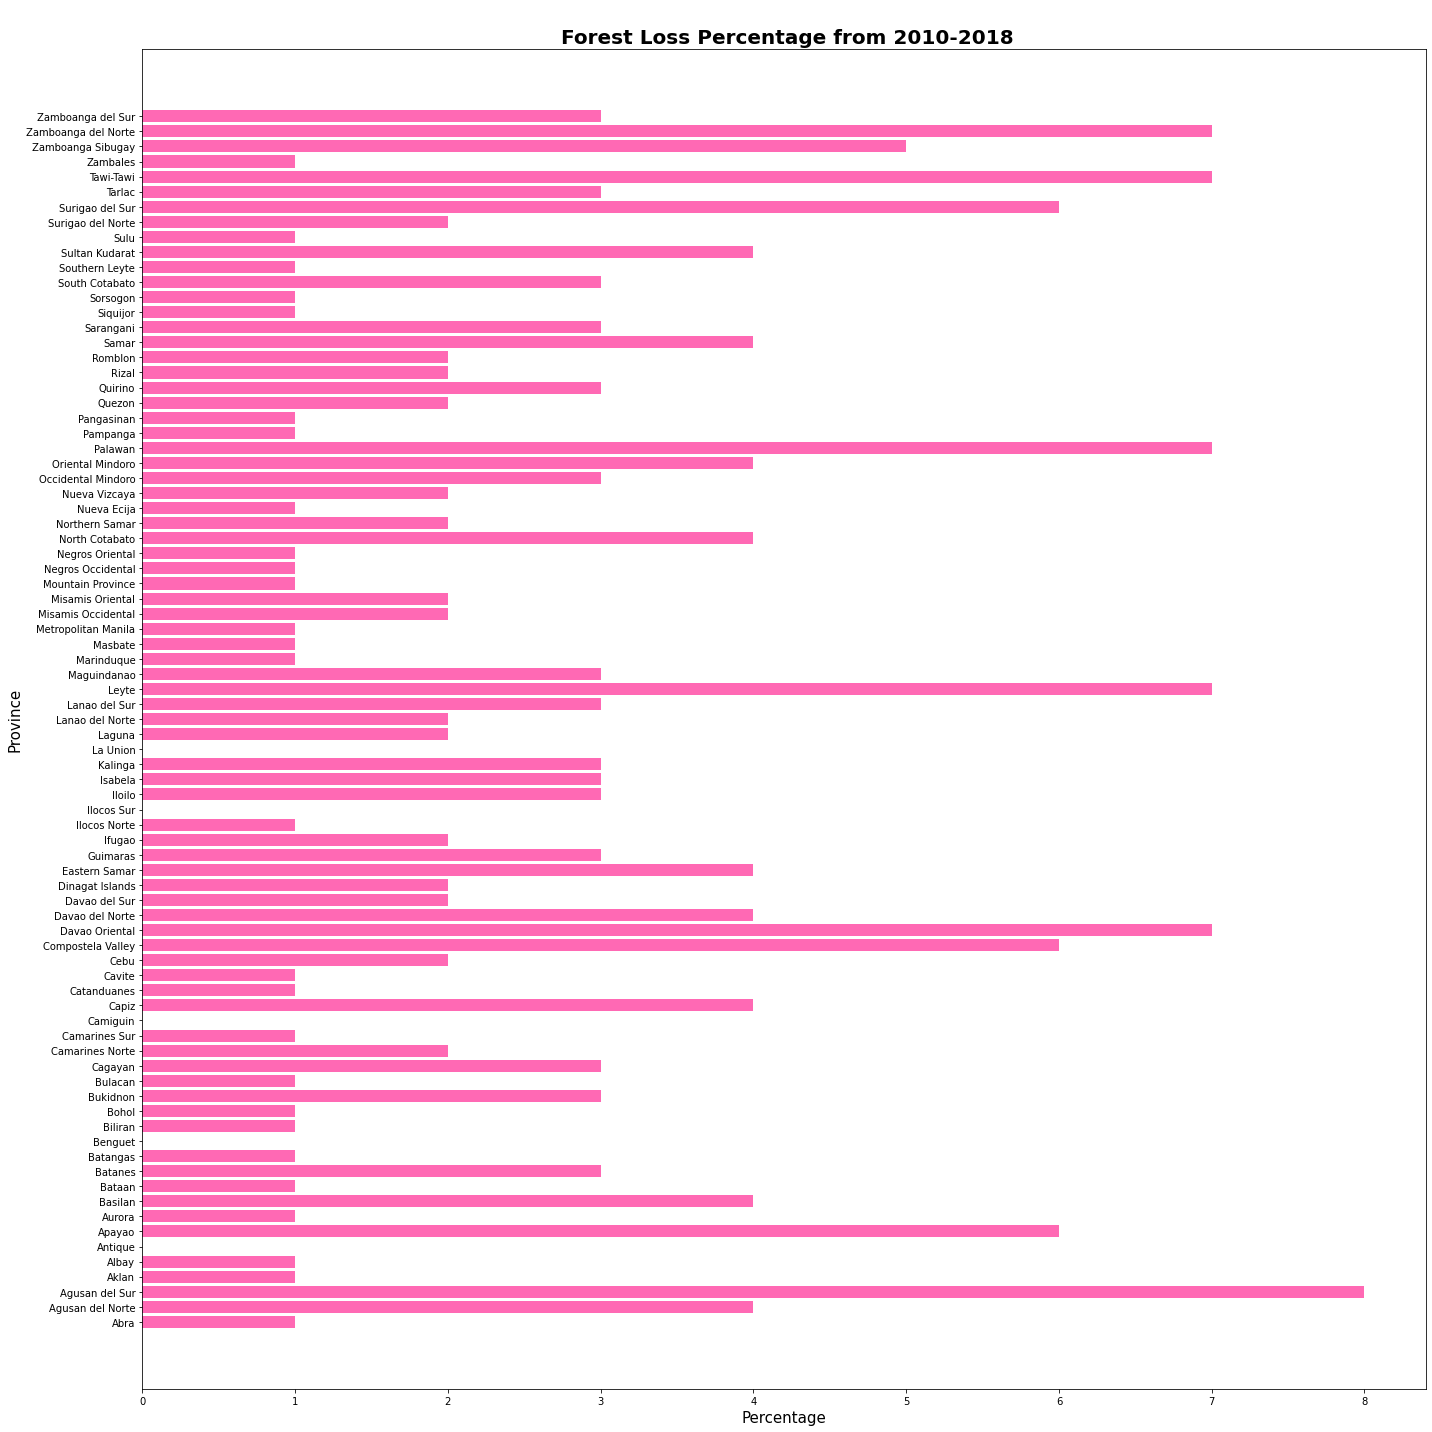

In [128]:
#Visualization
#getting all values from the dataframe/csv
Province = df2["Administrative area"]
Loss_Percentage = df2["loss.1"]

#changing the size of the entire graph
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

#Creating plots
plt.title("\n Forest Loss Percentage from 2010-2018", fontweight="bold", fontsize=20)
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Province", fontsize=15)
plt.barh(Province, Loss_Percentage, color="hotpink")
plt.show() 

In [131]:
mergedf = df.merge(df2, on='Administrative area', how='outer')
to_drop3 = ['Tree cover.1','Tree cover.2',]
mergedf.drop(to_drop3, inplace=True, axis=1)
display(mergedf)

,Administrative area,count,loss.1
0,Abra,4.0,1.0
1,Agusan del Norte,4.0,4.0
2,Agusan del Sur,3.0,8.0
3,Aklan,2.0,1.0
4,Albay,16.0,1.0
...,...,...,...
81,Sultan Kudarat,NaN,4.0
82,Sulu,NaN,1.0
83,Tarlac,NaN,3.0
84,Tawi-Tawi,NaN,7.0
